# Desafío - Gráficos y correlación

## 1. Importar librerías y <code>.csv</code>

<li>Importe las librerías básicas para el análisis de datos</li>
<li>Descargue e importe el archivo nations.csv.</li>
<li>Tip: El formato del archivo posee una codificación de tipo <code>'iso-8859-1'</code>. Investigue
cómo se puede solucionar este problema utilizando el argumento encoding de
<code>pd.read_csv</code>.</li>

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [190]:
df = pd.read_csv('nations.csv', encoding='latin')
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


## 2. Refactor gráficos matplotlib a seaborn

A continuación se presenta una serie de gráficos construidos con matplotlib. Se le pide
refactorizarlos utilizando seaborn.
<li>Se presenta la función que se utilizó para construirlos. Intente llegar al resultado con
mayor similitud. Comente los principales resultados de los gráficos.</li>

### a) Histograma

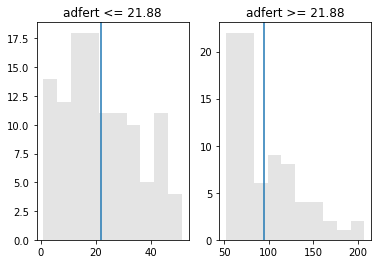

In [191]:
# Modo Original
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')


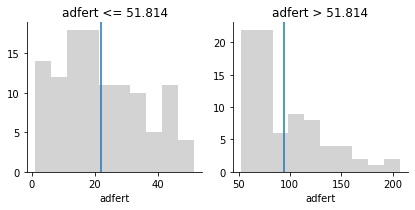

In [192]:
# Refactoring usando SNS
def binarize_histogram_sns(dataframe, variable):
    tmp = dataframe
    mean = np.mean(tmp[variable])
    tmp['binarize'] = np.where(tmp[variable] > mean, 1, 0)
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2, sharex=False, sharey=False)
    hist = grid.map(plt.hist, variable, color='lightgrey')
    hist.axes[0].set_title("{0} <= {1}".format(variable, round(mean, 3)))
    hist.axes[0].axvline(np.mean(tmp[tmp['binarize'] == 0][variable]))
    hist.axes[1].set_title("{0} > {1}".format(variable, round(mean, 3)))
    hist.axes[1].axvline(np.mean(tmp[tmp['binarize'] == 1][variable]))
binarize_histogram_sns(df, 'adfert')

### b) Boxplot

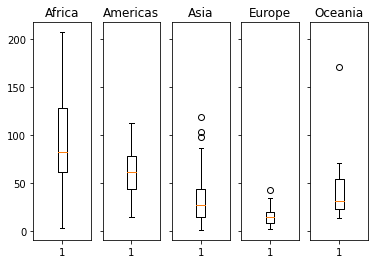

In [193]:
def grouped_boxplot_sns(dataframe, variable, group_by):
    tmp = dataframe
    
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot_sns(df, 'adfert', 'region')


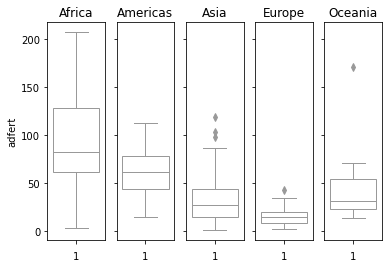

In [194]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        stratDf = tmp[tmp[group_by] == n]
        sns.boxplot(y=stratDf[variable], ax=ax[i], color="white", linewidth=1)
        ax[i].set_title(n)
        ax[i].set_xlabel(1)
        if i > 0:
            ax[i].set_ylabel(None)
        
grouped_boxplot(df, 'adfert', 'region')

### c) scatterplots

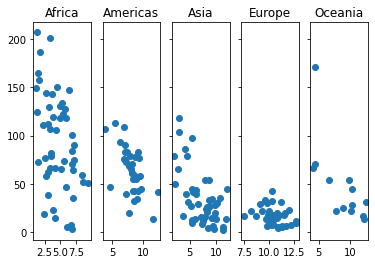

In [195]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

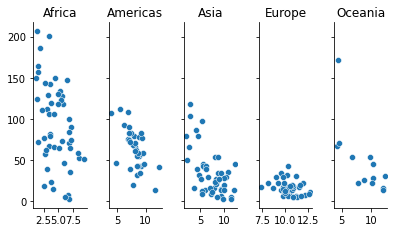

In [196]:
def grouped_scatterplot_sns(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    grid = sns.FacetGrid(tmp, col=group_by, col_wrap=len(stratify_by), sharex=False, sharey=True, height=3.5, aspect=.33)
    scatters = grid.map(sns.scatterplot, x, y, markers=['o'])
    for i, n in enumerate(stratify_by):
        scatters.axes[i].set_title(n)
        scatters.axes[i].set_ylabel(None)
        scatters.axes[i].set_xlabel(None)

grouped_scatterplot_sns(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables

<li>En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas superior a .6
</li>

Consideraremos aquellas correlaciones que cumplan $ |\rho| > 0.6 $, con el objetivo de contabilizar las proporcionalidades directas e inversas. También se omitirá la columna <code>Unnamed</code> y <code>binarize</code> pues no son variables continuas.

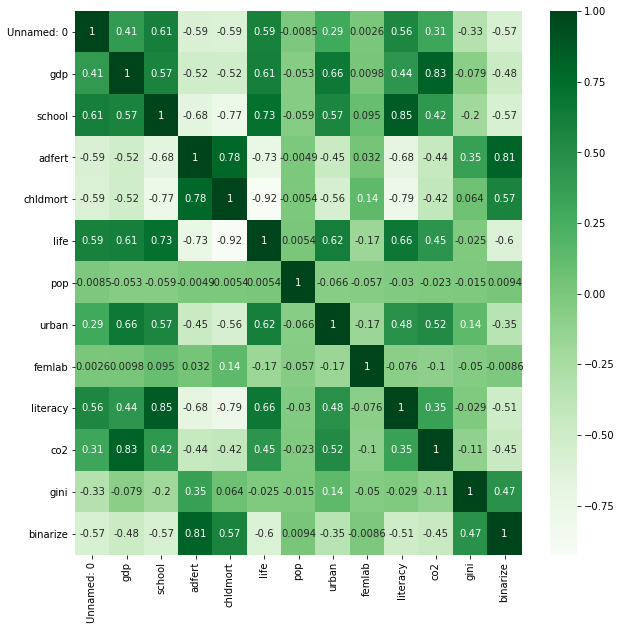

In [197]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(df.corr(), cmap="Greens", annot=True)

Tras Graficar podemos identificar las siguientes correlaciones:

### Proporcionalidad Directa:
<ul>
    <li>chldmort vs adfert</li>
    <li>life vs gdp</li>
    <li>life vs school</li>
    <li>urban vs gdp</li>
    <li>urban vs life</li>
    <li>literacy vs school</li>
    <li>literacy vs life</li>
    <li>co2 vs gdp</li>
</ul>

### Proporcionalidad Indirecta:
<ul>
    <li>school vs adfert</li>
    <li>chldmort vs school</li>
    <li>life vs adfert</li>
    <li>life vs chldmort</li>
    <li>literacy vs adfert</li>
    <li>literacy vs chldmort</li>
</ul>


## 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

<li><b>Tip:</b> Genere una nueva tabla segmentando con la siguiente sintaxis: =
df.loc[:,['variables', 'a', 'agregar']]. N. No olvide agregar la variable
region.</li>
<li><b>Tip:</b> Genere un loop para recorrer cada región y generar un heatmap.</li>
<li>Comente brevemente las principales correlaciones a través de las regiones.</li>

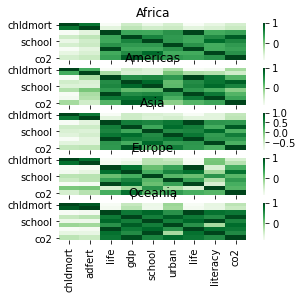

In [201]:
subDf = df.loc[:, ['chldmort', 'adfert', 'life', 'gdp', 'school', 'urban', 'life', 'literacy', 'co2', 'region']]
stratify_by = subDf['region'].unique()
fig, ax = plt.subplots(len(stratify_by), 1, sharey=True, sharex=True)
for i, n in enumerate(stratify_by):
    regionDf = subDf[subDf['region'] == n]
    sns.heatmap(regionDf.corr(), cmap="Greens", ax=ax[i])
    ax[i].set_title(n)

Se puede notar que la correlación de las principales variables es mas fuerte Oceanía, Asia y Américas, no asi tanto para Africa y Europa.